# Quickstart AltaiPony

Let's first get the base class and the IO function we want to use:

In [2]:
from altaipony.flarelc import FlareLightCurve
from altaipony.lcio import from_TargetPixel_source

Now download a **K2SC** light curve from archive and create a ``FlareLightCurve``.

(It's enough to pass the EPIC ID to ``from_K2SC_source``, but you could pass a path instead as well.)

In [3]:
EPIC = 211119999
flc = from_TargetPixel_source(EPIC)

Found cached file /home/eilin/.lightkurve-cache/mastDownload/K2/ktwo211119999-c04_lc/ktwo211119999-c04_lpd-targ.fits.gz with expected size 5449275.
5% (188/3470) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (188/3470) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


Let's verify that we succeeded:

In [4]:
flc

FlareLightCurve(ID: 211119999)

The representation tells us that we have indeed created a ``FlareLightCurve``.

Now let's look at some cool tools we inherited from the awesome [``lightkurve``](https://github.com/KeplerGO/lightkurve) package:

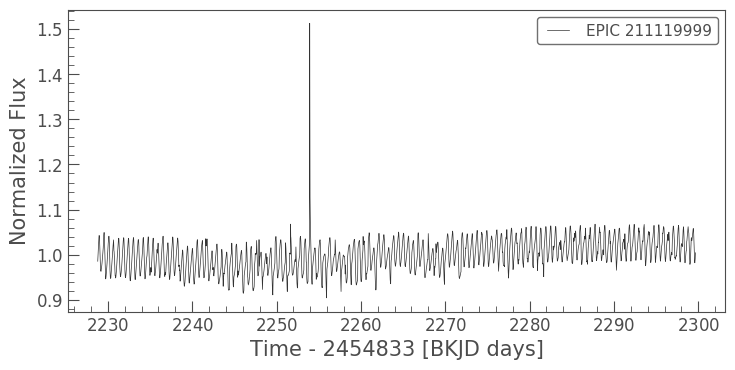

In [5]:
flc.plot()

This is the raw light curve. The is intrumental noise but also rotation variation. Let's remove it with K2SC:

In [6]:
flc = flc.detrend()

Starting initial outlier detection at 3sigma.
iteration 1 at normalized median flux1.00000 \pm 0.02336
iteration 2 at normalized median flux0.99995 \pm 0.02337
iteration 3 at normalized median flux0.99995 \pm 0.02337
iteration 4 at normalized median flux0.99995 \pm 0.02337
iteration 5 at normalized median flux0.99995 \pm 0.02337
iteration 6 at normalized median flux0.99995 \pm 0.02337
iteration 7 at normalized median flux0.99995 \pm 0.02337
iteration 8 at normalized median flux0.99995 \pm 0.02337
iteration 9 at normalized median flux0.99995 \pm 0.02337
iteration 10 at normalized median flux0.99995 \pm 0.02337
  Flagged 5 ( 0.2%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  Found periodicity p =    0.58 (fap 0.0000e+00 < 1e-50), will use a quasiperiodic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -3237.8200841021276
  DE iteration %3i -ln(L) %4.1f 1 -3237.8200841021276
  DE iteration %3i -ln(L) %4.1f 2 -

De-trending successfully completed.


  CDPP - raw - %6.3f 15636.371407608787
  CDPP - position component removed - %6.3f 14402.076198532839
  CDPP - full reduction - %6.3f 804.0394849540515
Detrending time %6.3f 464.19111013412476


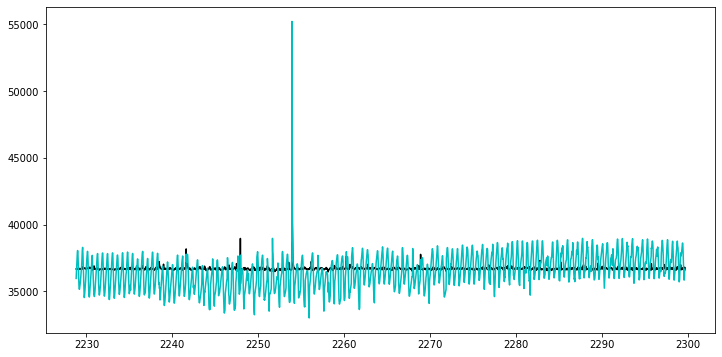

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(flc.time, flc.detrended_flux, c='k')
plt.plot(flc.time, flc.flux, c='c')

**K2SC** preserved flare signal fairly well, so this is what we use for flare finding.

So let us find the flares in this light curve (one, at least, is pretty obvious, right?)

In [13]:
flc.it_med = flc.it_med +1000

In [14]:
flc = flc.find_flares()
flc.flares

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop
0,0.005568,103745,103838,359.957924,3.036641,1,90,2228.820648,2230.720851
1,0.007392,103843,103854,50.810347,0.908251,95,106,2230.823013,2231.047768
2,0.002611,103858,103874,52.215938,1.343509,110,125,2231.129497,2231.456413
3,0.001968,103887,103893,12.369562,0.769551,137,143,2231.722032,2231.844625
4,0.002935,103899,103927,60.940351,1.701355,149,176,2231.967219,2232.539321
5,0.001533,103935,103938,7.291060,0.570814,183,186,2232.702779,2232.764076
6,0.001162,103946,103949,5.286085,0.576579,194,197,2232.927533,2232.988830
7,0.001918,103974,103982,20.884391,1.006858,221,228,2233.499635,2233.663092
8,0.004176,103991,104023,92.739319,1.674108,237,267,2233.846982,2234.500812
9,0.004421,104032,104057,86.909534,1.642718,275,299,2234.684701,2235.195505


AHA! Four flares! Let's see where they are:

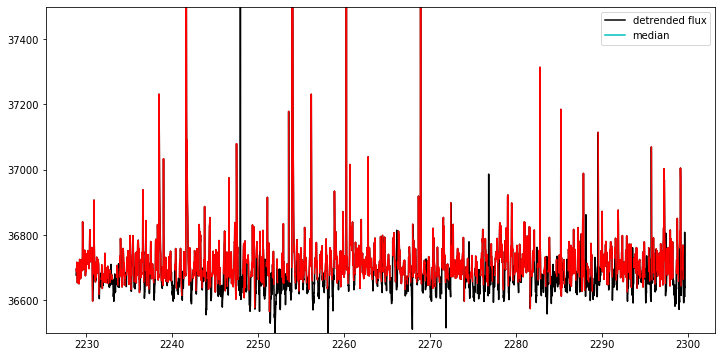

In [15]:
plt.figure(figsize=(12,6))
plt.plot(flc.time, flc.detrended_flux, c='k', label='detrended flux')
plt.plot(flc.time, flc.it_med, c='c', label='median')
for i,f in flc.flares.iterrows():
    plt.plot(flc.time[f.istart:f.istop+1], flc.detrended_flux[f.istart:f.istop+1], c='r')
plt.ylim(36500,37500)
plt.legend()

No surprise we found the big one. The other three are not that obvious.

Now, what if doubt that these three are real? 

What if it's just outliers and similar sized flares would be lost in the noise? 

Or rest undiscovered due to low time resolution?

Let us test that (may take a moment):

In [8]:
flc = flc.characterize_flares(iterations=100)
flc.flares

100%|#########################################################################|
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
Corrected ED = 120.41589636265277. Recovery probability  = 0.2345679012345679.

100%|#########################################################################|
/usr/local/lib/pyt

,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,tstart,tstop,ed_rec_corr,rec_prob
0,0.014471,104216,104219,70.207653,0.577276,454,457,2238.444211,2238.505507,120.415896,0.234568
1,0.040611,104370,104377,219.677122,0.782340,602,609,2241.590744,2241.733767,466.107208,0.897436
2,0.482190,104973,104982,1742.076356,0.647988,1178,1187,2253.931593,2254.115479,3468.422101,0.894040
3,0.008420,107093,107096,39.890413,0.592541,3180,3183,2297.246615,2297.307910,80.075406,0.042945


The first one is a shaky candidate. We'd recommend not considering any such flares as true events.

The large events are relatively likely flares as we would expect them. Flares with similar equivalent durations (ED)² as the two bigger flares are recovered in >80% of the cases. 

The last one is pretty much lost in the noise and is most likely an outlier that happens to fit the detection criteria¹ (2nd output line). 

We have run an injection recovery procedure, that introduces synthetic flares similar to the one we recovered and tries to find them again. 

The ``flares`` attribute stores the relevant information about each flare as soon as it is found. When we run the ``characterize_flares`` method on our ``FlareLightCurve``, we add the ``ed_rec_corr`` and ``rec_prob``  attributes. ``ed_rec_corr`` gives the ratio between the injected flare's ED and the recovered one in a bin around the observed value (here: 1601 s). ``rec_prob`` is the number of recovered flares relative to all injected ones, or recovery probability - again in a ED bin around the observed flare.

¹detection criteria are listed in the ``find_flares_in_cont_obs_period`` function in the ``altai`` module

²equivalent duration is a proxy for flare energy that is relative to total stellar flux. It is measured in seconds: It is how long the star needs to quietly shine until it has released just as much flux as the flare did.

We can look at what happens, when we inject and recover synthetic flares within **AltaiPony**:

In [15]:
data, fake_lc = flc.sample_flare_recovery(iterations=10)

100%|#########################################################################|


``fake_lc`` stores the flux with injected flare event after the last iteration: 

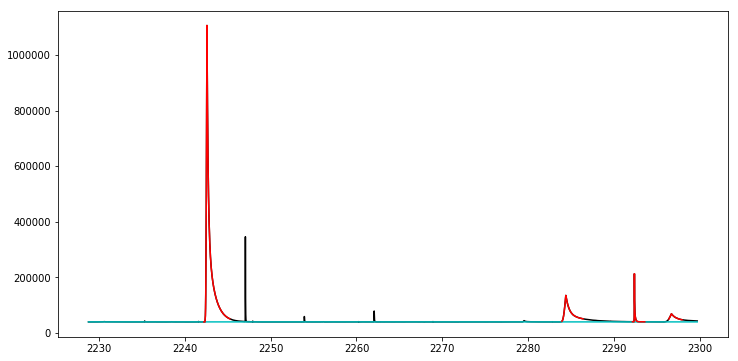

In [16]:
plt.figure(figsize=(12,6))
plt.plot(fake_lc.time, fake_lc.detrended_flux, c='k')
plt.plot(fake_lc.time, fake_lc.it_med, c='c')
for i,f in fake_lc.flares.iterrows():
    plt.plot(fake_lc.time[f.istart-10:f.istop+50], fake_lc.detrended_flux[f.istart-10:f.istop+50], c='r')

``data`` stores all injected flares, if they were recovered, and if yes, also the recovered ED, just as with real flares.

In [17]:
data.head()

,ampl_rec,amplitude,complex,cstart,cstop,duration_d,ed_inj,ed_rec,ed_rec_err,istart,istop,peak_time,tstart,tstop
0,17.553588,18.372665,1,104030.0,104060.0,0.617986,8.945820e+05,5.098454e+05,8.719006,273,302,2234.777104,2234.643837,2235.256802
1,75.366369,78.427928,1,106294.0,106355.0,0.794632,3.402444e+06,3.388557e+06,12.114441,2448,2504,2281.195389,2280.921768,2282.168093
2,30.932888,31.711827,2,106695.0,106757.0,0.797959,1.993099e+06,1.391467e+06,12.202514,2813,2870,2289.324177,2289.114829,2290.381588
3,0.000000,0.523004,1,0.0,0.0,0.017083,6.649938e+02,0.000000e+00,0.000000,0,0,2261.219349,0.000000,0.000000
4,0.000000,0.105542,1,0.0,0.0,0.625106,5.200392e+03,0.000000e+00,0.000000,0,0,2260.316268,0.000000,0.000000


Flares that overlap are summed up and treated as a single complex flare and the recovered ED is compared to the sum of injected EDs. Re-running ``sample_flare_recovery`` will yield complex flares every once in a while.